In [1]:
import pandas as pd
df= pd.read_csv(r"C:\Users\Access\Documents\AI ROBOT\XAUUSD_5m_trade_result_shooting_trade_list.csv" )

In [27]:
df.value_counts('trade_result_shooting')

trade_result_shooting
0    522381
2      3052
1       743
Name: count, dtype: int64

[LightGBM] [Info] Number of positive: 2442, number of negative: 594
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 3036, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.804348 -> initscore=1.413693
[LightGBM] [Info] Start training from score 1.413693
Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           1       0.19      0.05      0.08       149
           2       0.80      0.95      0.87       610

    accuracy                           0.77       759
   macro avg       0.50      0.50      0.47       759
weighted avg       0.68      0.77      0.71       759



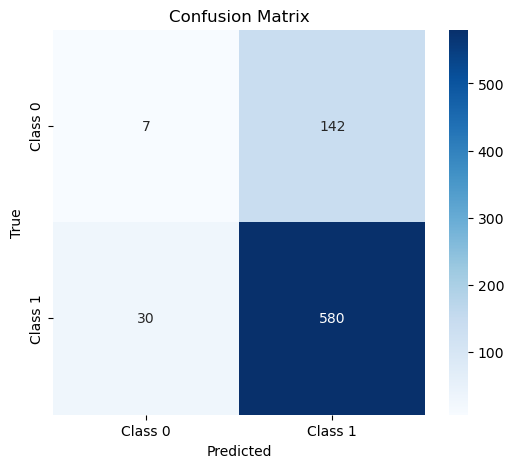

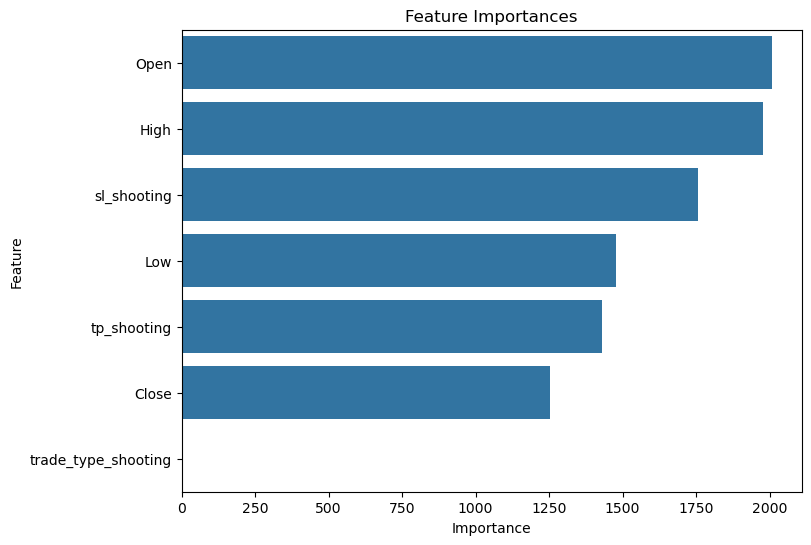

In [9]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df

# حذف الصفوف التي تحتوي على 0 في العمود trade_result_shooting
#df_filtered = df_filtered[df_filtered['trade_result_shooting'] != 0]

X = df_filtered[['Open','High','Low','Close','trade_type_shooting','tp_shooting','sl_shooting']]
y = df_filtered['trade_result_shooting']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# إنشاء نموذج LGBM
model = LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    num_leaves=100,
    learning_rate=0.2,
    n_estimators=100,
    random_state=42
)

# تدريب النموذج
model.fit(X_train, y_train)

# التنبؤ على بيانات الاختبار
y_pred = model.predict(X_test)

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# عرض تقرير التصنيف
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# عرض مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# أهمية الميزات
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

[LightGBM] [Info] Number of positive: 594, number of negative: 2442
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 3036, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Accuracy: 0.58
Classification Report (Class 1 as Positive):
                       precision    recall  f1-score   support

Class 0 (Original 2)       0.80      0.64      0.71       610
             Class 1       0.19      0.35      0.25       149

            accuracy                           0.58       759
           macro avg       0.50      0.50      0.48       759
        weighted avg       0.68      0.58      0.62       759



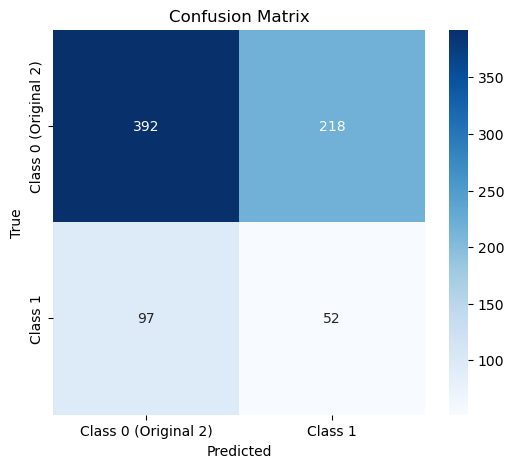

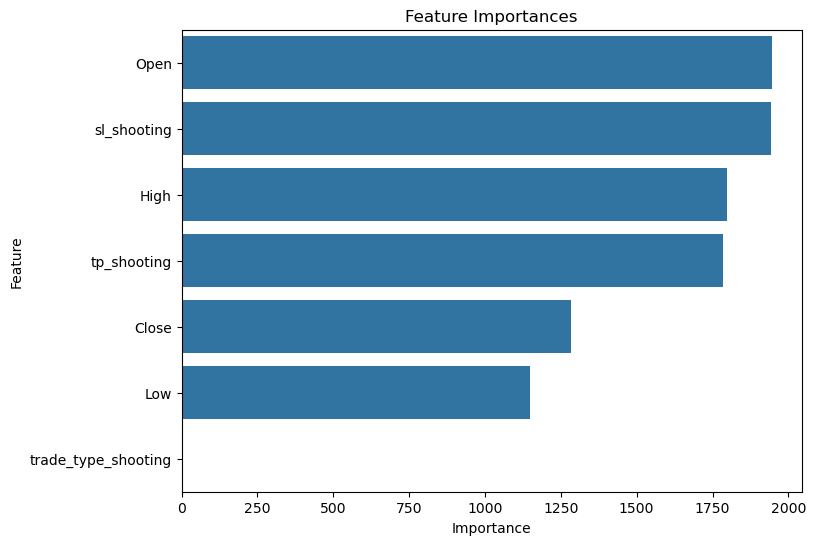

In [10]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df

# حذف الصفوف التي تحتوي على 0 في العمود trade_result_shooting
df_filtered = df_filtered[df_filtered['trade_result_shooting'] != 0]

# تحويل 2 إلى 0 في العمود y
y = df_filtered['trade_result_shooting'].replace(2, 0)

X = df_filtered[['Open','High','Low','Close','trade_type_shooting','tp_shooting','sl_shooting']]

# تقسيم البيانات مع stratify للحفاظ على توزيع الفئات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# إنشاء نموذج LGBM مع إعدادات للتركيز على الفئة 1
model = LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',  # تصنيف ثنائي
    num_leaves=100,
    learning_rate=0.2,
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # موازنة الفئات إذا كانت غير متوازنة
)

# تدريب النموذج
model.fit(X_train, y_train)

# التنبؤ على بيانات الاختبار
y_pred = model.predict(X_test)

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# تقرير التصنيف مع التركيز على الفئة 1
print("Classification Report (Class 1 as Positive):\n", classification_report(y_test, y_pred, target_names=['Class 0 (Original 2)', 'Class 1']))

# مصفوفة الالتباس مع التسميات الجديدة
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0 (Original 2)', 'Class 1'], yticklabels=['Class 0 (Original 2)', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# أهمية الميزات
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# التحقق من توزيع الفئات
print("توزيع الفئات في البيانات الكاملة:")
print(y_binary.value_counts())

# تقسيم البيانات مع الحفاظ على التوزيع
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, 
    y_binary,
    test_size=0.3,
    stratify=y_binary,  # الحفاظ على توزيع الفئات
    random_state=42
)

# التحقق من توزيع الفئات في مجموعة التدريب
print("\nتوزيع الفئات في مجموعة التدريب:")
print(np.unique(y_train2, return_counts=True))

# إنشاء النموذج مع التحقق من وجود الفئات
try:
    svm_model2 = SVC(
        kernel='linear',
        class_weight='balanced',
        probability=True,
        random_state=42
    )
    
    svm_model2.fit(X_train2, y_train2)
    
    # التقييم
    y_pred2 = svm_model2.predict(X_test2)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test2, 
        y_pred2, 
        average='binary',
        zero_division=0
    )
    
    print(f"\nالدقة للصفقات الخاسرة: {precision:.2f}")
    print(f"الاستدعاء للصفقات الخاسرة: {recall:.2f}")
    print(f"F1 Score للصفقات الخاسرة: {f1:.2f}")
    
except ValueError as e:
    print(f"\nخطأ في التدريب: {str(e)}")
    print("السبب المحتمل: отсутствие примеров одного из классов в обучающих данных")

توزيع الفئات في البيانات الكاملة:
trade_result_shooting
0    525433
1       743
Name: count, dtype: int64

توزيع الفئات في مجموعة التدريب:
(array([0, 1], dtype=int64), array([367803,    520], dtype=int64))

خطأ في التدريب: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
السبب المحتمل: отсутствие примеров одного из классов в обучающих данных


In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

# تحضير البيانات
X = df[['Open','High','Low','Close','trade_type_shooting','tp_shooting','sl_shooting']]
y = df['trade_result_shooting']
y_binary = np.where(y == 1, 1, 0)  # تحويل إلى تصنيف ثنائي

# تسوية البيانات
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# دالة لإنشاء تسلسلات زمنية
def create_sequences(data, targets, window_size):
    X_seq, y_seq = [], []
    for i in range(len(data) - window_size):
        X_seq.append(data[i:i+window_size])
        y_seq.append(targets[i+window_size])
    return np.array(X_seq), np.array(y_seq)

# إنشاء تسلسلات بحجم نافذة 3
window_size = 3
X_seq, y_seq = create_sequences(X_scaled, y_binary, window_size)

# تقسيم البيانات مع الحفاظ على الترتيب الزمني
train_size = int(0.7 * len(X_seq))
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# بناء نموذج LSTM
model = Sequential()
model.add(LSTM(64, 
               input_shape=(window_size, X_train.shape[2]), 
               return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# تجميع النموذج
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# إضافة إيقاف مبكر
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# تدريب النموذج
history = model.fit(X_train, y_train,
                    epochs=3,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

# تقييم النموذج
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nتقرير التصنيف:")
print(classification_report(y_test, y_pred))

Epoch 1/3


C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2302/2302 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.9984 - loss: nan - val_accuracy: 0.9987 - val_loss: nan
Epoch 2/3
2302/2302 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.9986 - loss: nan - val_accuracy: 0.9987 - val_loss: nan
Epoch 3/3
2302/2302 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.9986 - loss: nan - val_accuracy: 0.9987 - val_loss: nan
4933/4933 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step

تقرير التصنيف:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    157633
           1       0.00      0.00      0.00       219

    accuracy                           1.00    157852
   macro avg       0.50      0.50      0.50    157852
weighted avg       1.00      1.00      1.00    157852



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# تصفية البيانات لإزالة الصفقات التي لا يوجد فيها تداول (0)
mask = (y == 1) | (y == 2)
X_filtered = X[mask]
y_filtered = y[mask]

# تحويل التسميات إلى 0 و1 (1 => 0 خاسرة، 2 => 1 رابحة)
y_filtered = np.where(y_filtered == 1, 0, 1)

# تسوية البيانات
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_filtered)

# دالة لإنشاء تسلسلات زمنية
def create_sequences(data, targets, window_size):
    X_seq, y_seq = [], []
    for i in range(len(data) - window_size):
        X_seq.append(data[i:i+window_size])
        y_seq.append(targets[i+window_size])
    return np.array(X_seq), np.array(y_seq)

# إنشاء تسلسلات بحجم نافذة 3
window_size = 3
X_seq, y_seq = create_sequences(X_scaled, y_filtered, window_size)

# تقسيم البيانات مع الحفاظ على الترتيب الزمني
train_size = int(0.7 * len(X_seq))
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# بناء نموذج LSTM
model = Sequential()
model.add(LSTM(64, 
               input_shape=(window_size, X_train.shape[2]), 
               return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # طبقة إخراج واحدة للتصنيف الثنائي

# تجميع النموذج
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# إضافة إيقاف مبكر
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# تدريب النموذج مع موازنة الفئات
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=100,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    class_weight={0: 5, 1: 0},  # زيادة وزن الصفقات الرابحة
                    verbose=1)

# تقييم النموذج
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nتقرير التصنيف:")
print(classification_report(y_test, y_pred, target_names=['خاسرة', 'رابحة']))

Epoch 1/20


C:\Users\Access\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.2893 - loss: 0.6274 - val_accuracy: 0.1902 - val_loss: 0.9345
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1989 - loss: 0.3242 - val_accuracy: 0.1902 - val_loss: 2.8385
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1886 - loss: 0.0250 - val_accuracy: 0.1902 - val_loss: 4.9776
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1868 - loss: 0.0048 - val_accuracy: 0.1902 - val_loss: 5.6218
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1866 - loss: 0.0026 - val_accuracy: 0.1902 - val_loss: 5.9054
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2005 - loss: 0.0019 - val_accuracy: 0.1902 - val_loss: 6.0921
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

تقرير التصنيف:
              precision    recall  f1-score   support

       خاسرة       0.20      1.00      0.34       230
       رابحة       0.00      0.00      0.00       908

    accuracy                 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
العتبة المثلى: 0.1447
أعلى F1-Score: 0.8876
الدقة عند العتبة المثلى: 0.7979
الاستدعاء عند العتبة المثلى: 1.0000


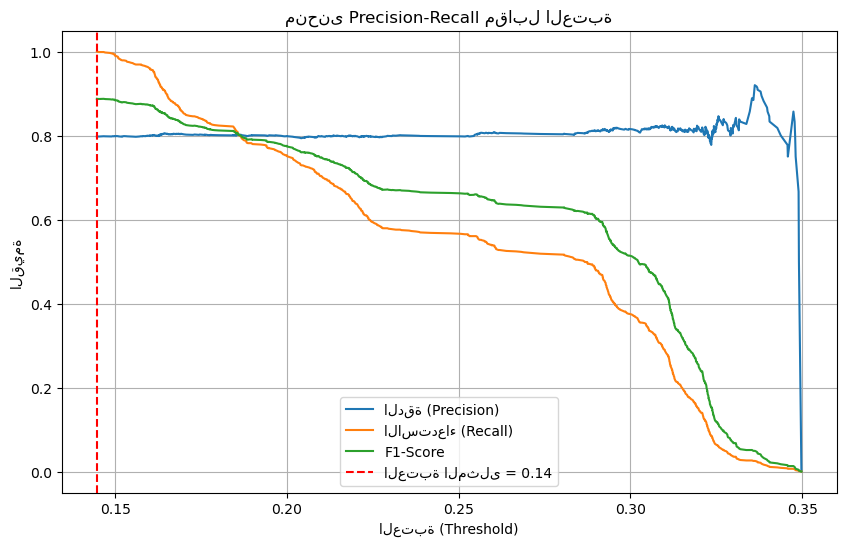


تقرير التصنيف بعد تطبيق العتبة المثلى:
              precision    recall  f1-score   support

       خاسرة       0.00      0.00      0.00       230
       رابحة       0.80      1.00      0.89       908

    accuracy                           0.80      1138
   macro avg       0.40      0.50      0.44      1138
weighted avg       0.64      0.80      0.71      1138



In [30]:
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# 1. الحصول على احتمالات التنبؤ
y_pred_probs = model.predict(X_test)

# 2. حساب Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)

# 3. حساب F1-Score لكل عتبة
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # إضافة قيمة صغيرة لتجنب القسمة على صفر

# 4. إيجاد العتبة المثلى (التي تعطي أعلى F1-Score)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

# 5. طباعة النتائج
print(f"العتبة المثلى: {optimal_threshold:.4f}")
print(f"أعلى F1-Score: {optimal_f1:.4f}")
print(f"الدقة عند العتبة المثلى: {precision[optimal_idx]:.4f}")
print(f"الاستدعاء عند العتبة المثلى: {recall[optimal_idx]:.4f}")

# 6. رسم منحنى Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='الدقة (Precision)')
plt.plot(thresholds, recall[:-1], label='الاستدعاء (Recall)')
plt.plot(thresholds, f1_scores[:-1], label='F1-Score')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', 
            label=f'العتبة المثلى = {optimal_threshold:.2f}')
plt.xlabel('العتبة (Threshold)')
plt.ylabel('القيمة')
plt.title('منحنى Precision-Recall مقابل العتبة')
plt.legend()
plt.grid(True)
plt.show()

# 7. تطبيق العتبة المثلى على التنبؤات
y_pred_optimized = (y_pred_probs > optimal_threshold).astype(int)

# 8. طباعة تقرير التصنيف بعد التحسين
from sklearn.metrics import classification_report
print("\nتقرير التصنيف بعد تطبيق العتبة المثلى:")
print(classification_report(y_test, y_pred_optimized, target_names=['خاسرة', 'رابحة']))

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.4803 - loss: 1.3854 - precision: 0.2059 - recall: 0.6186 - val_accuracy: 0.2147 - val_loss: 0.7752 - val_precision: 0.2147 - val_recall: 1.0000
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2016 - loss: 1.2181 - precision: 0.1888 - recall: 0.9819 - val_accuracy: 0.2147 - val_loss: 0.7764 - val_precision: 0.2147 - val_recall: 1.0000
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1843 - loss: 1.2051 - precision: 0.1843 - recall: 1.0000 - val_accuracy: 0.2147 - val_loss: 0.7501 - val_precision: 0.2147 - val_recall: 1.0000
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1757 - loss: 1.1826 - precision: 0.1757 - recall: 1.0000 - val_accuracy: 0.2147 - val_loss: 0.8211 - val_precision: 0.2147 - val_recall: 1.0000
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2406 - loss: 1.2181 - precision: 0.1867 - recall: 0.9074 - val_accuracy: 0.2147 - val_loss: 0

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


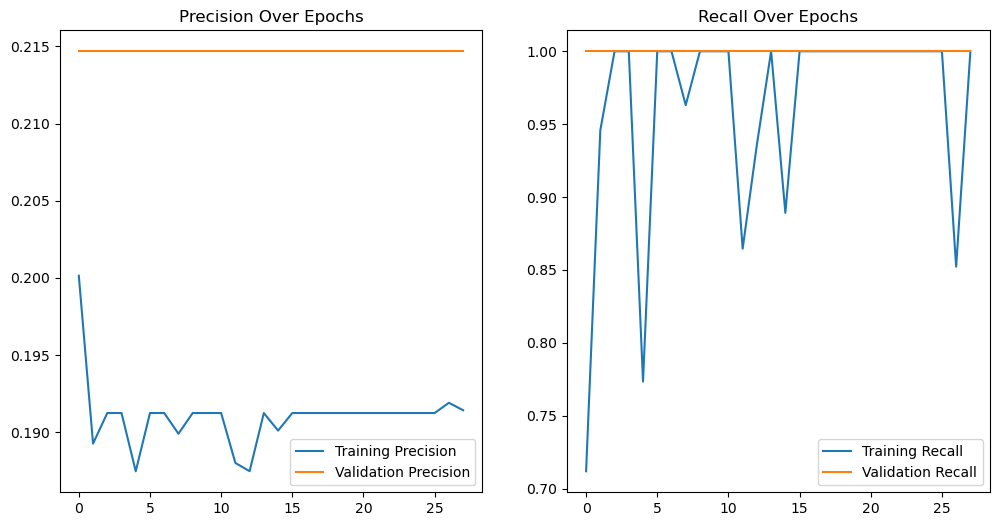

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, precision_recall_curve
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Dropout, Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.metrics import Precision, Recall  # التصحيح هنا
import matplotlib.pyplot as plt

# 1. تحضير البيانات
mask = (df['trade_result_shooting'] != 0)
X = df.loc[mask, ['Open','High','Low','Close','trade_type_shooting','tp_shooting','sl_shooting']]
y = df.loc[mask, 'trade_result_shooting'].replace({2: 0})

# 2. تسوية البيانات
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. إنشاء تسلسلات زمنية
def create_sequences(data, targets, window_size):
    X_seq, y_seq = [], []
    for i in range(len(data) - window_size):
        X_seq.append(data[i:i+window_size])
        y_seq.append(targets[i+window_size])
    return np.array(X_seq), np.array(y_seq)

window_size = 3
X_seq, y_seq = create_sequences(X_scaled, y.values, window_size)

# 4. تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, 
    y_seq,
    test_size=0.3,
    stratify=y_seq,
    random_state=42
)

# 5. بناء النموذج المعدل
model = Sequential()
model.add(Input(shape=(window_size, X_train.shape[2])))  # إصلاح تحذير الشكل
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 6. تجميع النموذج مع التصحيح
model.compile(
    optimizer=Adam(learning_rate=0.05),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]  # التصحيح هنا
)

# 7. التدريب
class_weight = {0: 1, 1: 5}
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
    class_weight=class_weight
)

# 8. حساب العتبة المثلى
y_pred_probs = model.predict(X_test).flatten()
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# 9. التقييم النهائي
y_pred_optimized = (y_pred_probs > optimal_threshold).astype(int)
print("\n" + "="*50)
print(f"العتبة المثلى: {optimal_threshold:.4f}")
print("="*50)
print(classification_report(y_test, y_pred_optimized, target_names=['رابحة', 'خاسرة']))

# 10. رسم المنحنيات
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Precision Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Recall Over Epochs')
plt.legend()
plt.show()

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, precision_recall_curve
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Dropout, Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.metrics import Precision, Recall
import matplotlib.pyplot as plt

# 1. تحضير البيانات
mask = (df['trade_result_shooting'] != 0)
X = df.loc[mask, ['Open','High','Low','Close','trade_type_shooting','tp_shooting','sl_shooting']]
y = df.loc[mask, 'trade_result_shooting'].replace({2: 0})

# 2. تسوية البيانات
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. إنشاء تسلسلات زمنية
def create_sequences(data, targets, window_size):
    X_seq, y_seq = [], []
    for i in range(len(data) - window_size):
        X_seq.append(data[i:i+window_size])
        y_seq.append(targets[i+window_size])
    return np.array(X_seq), np.array(y_seq)

window_size = 3
X_seq, y_seq = create_sequences(X_scaled, y.values, window_size)

# 4. تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, 
    y_seq,
    test_size=0.3,
    stratify=y_seq,
    random_state=42
)

# 5. بناء النموذج المعدل
model = Sequential()
model.add(Input(shape=(window_size, X_train.shape[2])))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 6. تجميع النموذج مع إعدادات محسنة
model.compile(
    optimizer=Adam(learning_rate=0.001),  # تخفيض معدل التعلم
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

# 7. إضافة Callbacks للتحكم في التدريب
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        'best_model.h5',
        monitor='val_recall',  # التركيز على تحسين الاستدعاء
        mode='max',
        save_best_only=True,
        verbose=0
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

# 8. التدريب مع إعدادات محسنة
class_weight = {0: 1, 1: 5}  # يمكن تعديل الأوزان حسب توزيع البيانات
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,  # زيادة حجم الدفعة لتحسين الاستقرار
    validation_split=0.2,
    callbacks=callbacks,
    class_weight=class_weight,
    verbose=1
)

# 9. تحميل أفضل الأوزان
model.load_weights('best_model.h5')

# 10. حساب العتبة المثلى
y_pred_probs = model.predict(X_test).flatten()
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# 11. التقييم النهائي
y_pred_optimized = (y_pred_probs > optimal_threshold).astype(int)
print("\n" + "="*50)
print(f"العتبة المثلى: {optimal_threshold:.4f}")
print("="*50)
print(classification_report(y_test, y_pred_optimized, target_names=['رابحة', 'خاسرة']))

# 12. رسم المنحنيات
plt.figure(figsize=(15, 6))

# رسم أداء الدقة والاستدعاء
plt.subplot(1, 2, 1)
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Training Performance')
plt.ylabel('Score')
plt.xlabel('Epoch')
plt.legend()

# رسم فقدان التدريب والتحقق
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=best_model.h5

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 17s 126ms/step - accuracy: 0.7664 - loss: 2.7256 - precision: 0.1914 - recall: 0.0686 - val_accuracy: 0.7853 - val_loss: 0.5270 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0300
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8072 - loss: 2.4999 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7853 - val_loss: 0.5236 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0300
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8003 - loss: 2.5132 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7853 - val_loss: 0.5206 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0300
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8048 - loss: 2.4962 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7853 - val_loss: 0.5239 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0300
Epoch 

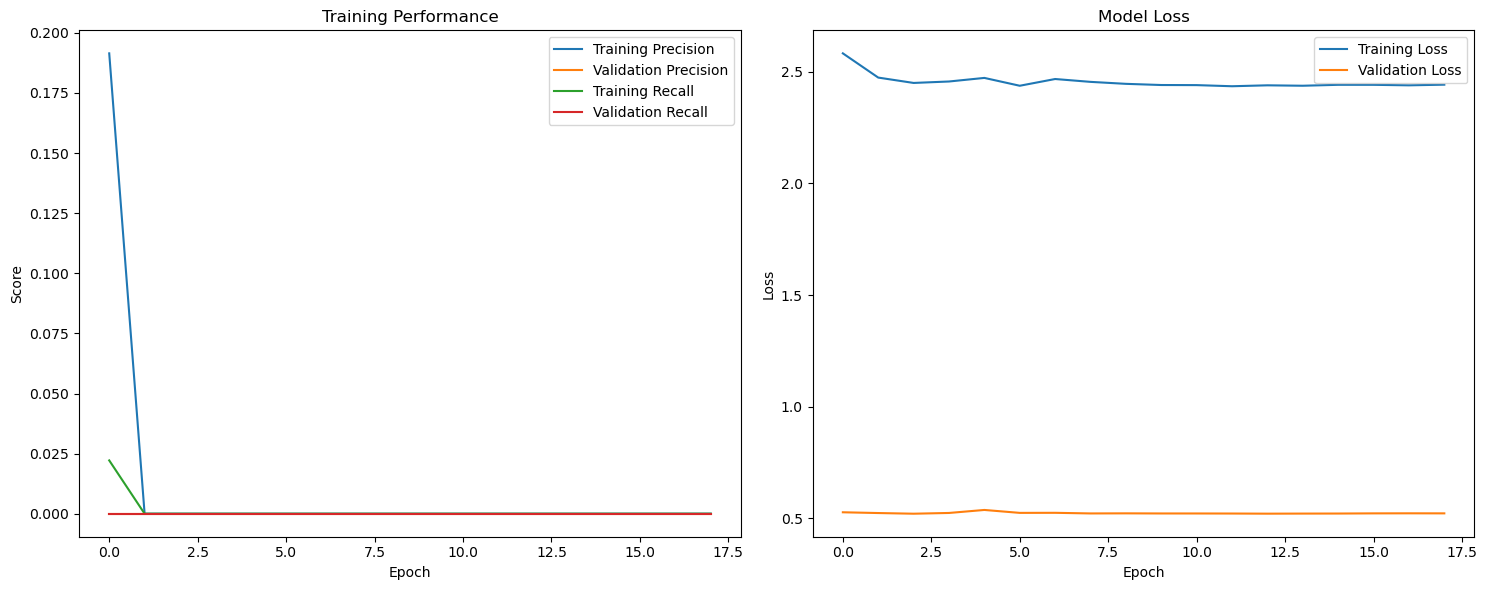

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, precision_recall_curve
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Dropout, Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.metrics import Precision, Recall
import matplotlib.pyplot as plt

# 1. تحضير البيانات
mask = (df['trade_result_shooting'] != 0)
X = df.loc[mask, ['Open','High','Low','Close','trade_type_shooting','tp_shooting','sl_shooting']]
y = df.loc[mask, 'trade_result_shooting'].replace({2: 0})

# 2. تسوية البيانات
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. إنشاء تسلسلات زمنية
def create_sequences(data, targets, window_size):
    X_seq, y_seq = [], []
    for i in range(len(data) - window_size):
        X_seq.append(data[i:i+window_size])
        y_seq.append(targets[i+window_size])
    return np.array(X_seq), np.array(y_seq)

window_size = 3
X_seq, y_seq = create_sequences(X_scaled, y.values, window_size)

# 4. تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, 
    y_seq,
    test_size=0.3,
    stratify=y_seq,
    random_state=42
)

# 5. بناء النموذج المعدل
model = Sequential()
model.add(Input(shape=(window_size, X_train.shape[2])))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 6. تجميع النموذج مع إعدادات محسنة
model.compile(
    optimizer=Adam(learning_rate=0.03),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

# 7. إضافة Callbacks للتحكم في التدريب
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        'best_model.keras',  # تغيير الامتداد إلى .keras
        monitor='val_recall',
        mode='max',
        save_best_only=True,
        verbose=0
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

# 8. التدريب مع إعدادات محسنة
class_weight = {0: 5, 1: 5}
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks,
    class_weight=class_weight,
    verbose=1
)

# 9. تحميل أفضل الأوزان
model.load_weights('best_model.keras')  # تغيير الامتداد هنا أيضًا

# 10. حساب العتبة المثلى
y_pred_probs = model.predict(X_test).flatten()
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# 11. التقييم النهائي
y_pred_optimized = (y_pred_probs > optimal_threshold).astype(int)
print("\n" + "="*50)
print(f"العتبة المثلى: {optimal_threshold:.4f}")
print("="*50)
print(classification_report(y_test, y_pred_optimized, target_names=['رابحة', 'خاسرة']))

# 12. رسم المنحنيات
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Training Performance')
plt.ylabel('Score')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

الأوزان: {0: 0.6217228464419475, 1: 2.553846153846154}
Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0920 - mae: 0.2671 - val_loss: 0.0897 - val_mae: 0.2640
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0883 - mae: 0.2637 - val_loss: 0.0831 - val_mae: 0.2539
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0829 - mae: 0.2545 - val_loss: 0.0773 - val_mae: 0.2437
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0758 - mae: 0.2408 - val_loss: 0.0724 - val_mae: 0.2338
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0694 - mae: 0.2292 - val_loss: 0.0681 - val_mae: 0.2243
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0663 - mae: 0.2219 - val_loss: 0.0647 - val_mae: 0.2161
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0624 - mae: 0.2124 - val_loss: 0.0619 - val_mae: 0.2090
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0599 - mae: 0.2054 - val_loss: 0.0595 - val_mae: 0.2026
Epoch 9/

C:\Users\Access\AppData\Local\Temp\ipykernel_25348\3114141078.py:101: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_mse[y_test == 0], label='ناجحة', shade=True)
C:\Users\Access\AppData\Local\Temp\ipykernel_25348\3114141078.py:102: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_mse[y_test == 1], label='خاسرة', shade=True)


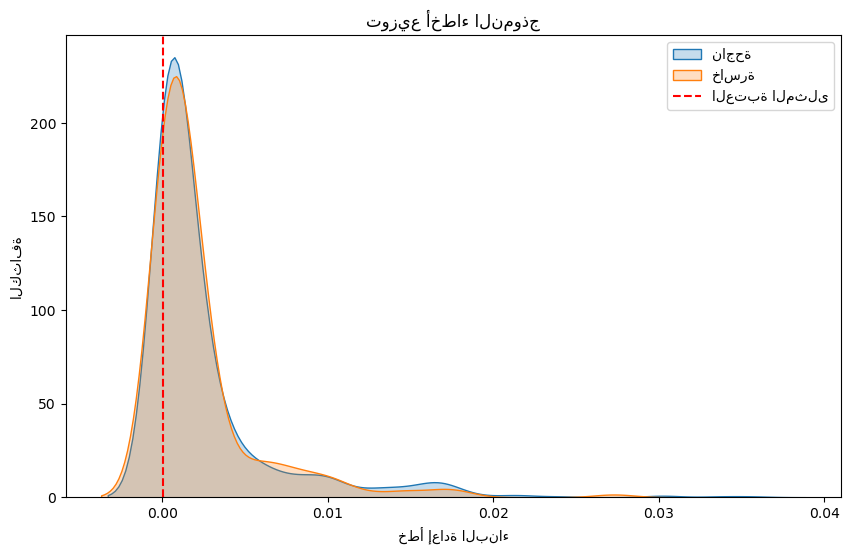

In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

# تحميل البيانات
X = df[['Open','High','Low','Close','trade_type_shooting','tp_shooting','sl_shooting']]
y = df['trade_result_shooting']

# 1. تحضير البيانات
# تصفية الفئة 0 (لا يوجد صفقات)
mask = y != 0
X_filtered = X[mask]
y_filtered = y[mask]

# تحويل المشكلة إلى ثنائية (1 = خاسرة، 0 = ناجحة)
y_binary = np.where(y_filtered == 1, 1, 0)

# 2. تسوية البيانات
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_filtered)

# 3. تقسيم البيانات مع الحفاظ على التوازن
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y_binary,
    test_size=0.3,
    stratify=y_binary,
    random_state=42
)

# 4. حساب الأوزان حسب توزيع الفئات
class_counts = np.bincount(y_train)
total = len(y_train)
weight_for_0 = (1 / class_counts[0]) * (total / 2.0)
weight_for_1 = (1 / class_counts[1]) * (total / 2.0)

class_weights = {0: weight_for_0, 1: weight_for_1}
print(f"الأوزان: {class_weights}")

# 5. بناء نموذج Autoencoder
input_dim = X_train.shape[1]
encoding_dim = 4  # يمكن تعديل حسب تعقيد البيانات

# الهيكل
input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
decoder = tf.keras.layers.Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoder)

# التجميع مع تحديد الأوزان
autoencoder.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# 6. التدريب
history = autoencoder.fit(
    X_train[y_train == 0],  # تدريب على الفئة الطبيعية (الصفقات الناجحة)
    X_train[y_train == 0],
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ],
    verbose=1
)

# 7. حساب خطأ إعادة البناء
train_recon = autoencoder.predict(X_train)
train_mse = np.mean(np.power(X_train - train_recon, 2), axis=1)

test_recon = autoencoder.predict(X_test)
test_mse = np.mean(np.power(X_test - test_recon, 2), axis=1)

# 8. إيجاد العتبة المثلى
precision, recall, thresholds = precision_recall_curve(y_test, test_mse)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# 9. التقييم
y_pred = (test_mse > optimal_threshold).astype(int)

print("\n" + "="*50)
print(f"العتبة المثلى: {optimal_threshold:.4f}")
print("="*50)
print(classification_report(y_test, y_pred, target_names=['ناجحة', 'خاسرة']))
print(f"AUC-ROC: {roc_auc_score(y_test, test_mse):.4f}")

# 10. تصور توزيع الأخطاء
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(test_mse[y_test == 0], label='ناجحة', shade=True)
sns.kdeplot(test_mse[y_test == 1], label='خاسرة', shade=True)
plt.axvline(optimal_threshold, color='r', linestyle='--', label='العتبة المثلى')
plt.xlabel('خطأ إعادة البناء')
plt.ylabel('الكثافة')
plt.title('توزيع أخطاء النموذج')
plt.legend()
plt.show()